#### Embedding Generation:
The core purpose of this section is to generate embeddings for a set of test texts using two different methods: Azure OpenAI's advanced language model and the traditional TF-IDF approach. This allows for a comparison between a state-of-the-art, semantically rich embedding technique and a simpler, statistical method.
##### Test Texts:
The code uses a small set of climate change-related sentences. These serve as sample inputs to demonstrate how each embedding method represents similar, yet distinct, pieces of text.
##### Visualization:
By reducing the high-dimensional embeddings to 2D using PCA, the code allows for visual comparison of how each method clusters similar concepts. This visualization helps in understanding how each method captures relationships between the test sentences.
##### Similar Word Finding:
This part demonstrates a practical application of embeddings: finding semantically similar words. It shows how each embedding method can be used to identify words that are conceptually close to a given term (in this case, "climate change").
##### Comparison of Approaches:

 ##### Azure OpenAI:
  Represents cutting-edge NLP technology, capable of capturing complex semantic relationships and nuances in language.
##### TF-IDF: 
Represents a traditional, statistical approach to text representation, based on word frequency and importance within a document set.


##### Practical Implications:

The comparison helps in understanding when to use each method. For tasks requiring deep semantic understanding, Azure OpenAI might be preferable. For simpler tasks or when interpretability is key, TF-IDF might suffice.
It also demonstrates the trade-offs between computational complexity and semantic richness in text representation.








Generating embeddings for model 'text-embedding-ada-002'
Successfully generated 4 embeddings.

Generating embeddings for model 'tfidf'
Successfully generated 4 embeddings.

Model: text-embedding-ada-002
Embedding dimension: 1536


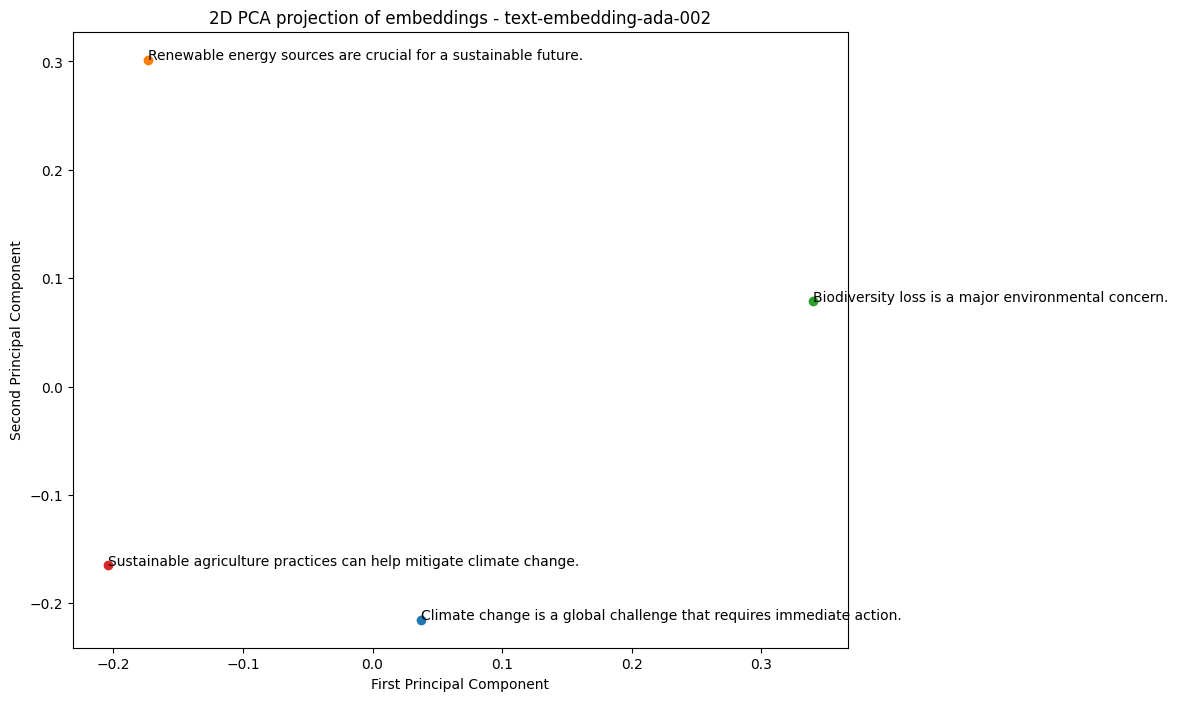


Model: tfidf
Embedding dimension: 27


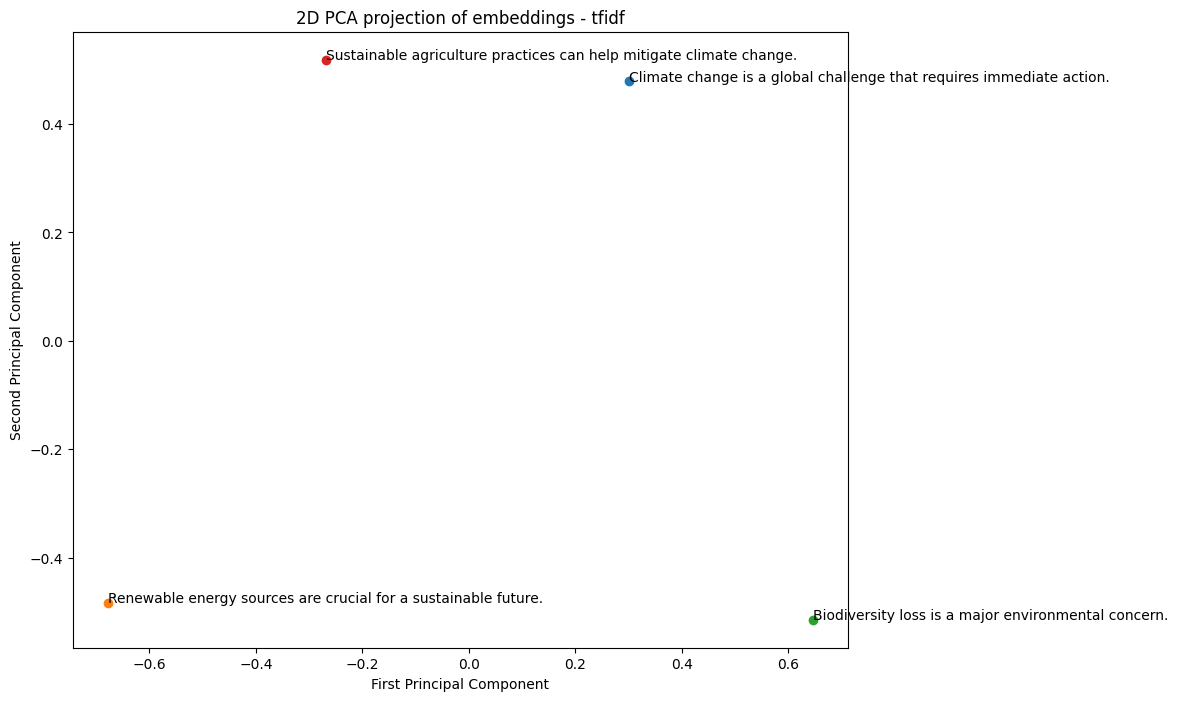


Finding similar words for 'climate change' in each model:

Model: text-embedding-ada-002
  climate: 0.9062
  sustainability: 0.8304
  biodiversity: 0.8281
  environment: 0.8213
  future: 0.8126

Model: tfidf
  climate: 0.7071
  practice: 0.0000
  concern: 0.0000
  future: 0.0000
  action: 0.0000


In [1]:
import os
from dotenv import load_dotenv
from openai import AzureOpenAI
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load environment variables
load_dotenv('variables.env')
azure_openai_api_key = os.getenv('AZURE_OPENAI_API_KEY')
azure_openai_api_version = os.getenv('AZURE_OPENAI_API_VERSION')
azure_endpoint = os.getenv('AZURE_OPENAI_ENDPOINT')

# Initialize Azure OpenAI client
client = AzureOpenAI(
    api_key=azure_openai_api_key,
    api_version=azure_openai_api_version,
    azure_endpoint=azure_endpoint
)

# Define embedding models
embedding_models = [
    "text-embedding-ada-002",
    "tfidf"
]

# Test texts
test_texts = [
    "Climate change is a global challenge that requires immediate action.",
    "Renewable energy sources are crucial for a sustainable future.",
    "Biodiversity loss is a major environmental concern.",
    "Sustainable agriculture practices can help mitigate climate change.",
]

def get_embedding_azure(text, model):
    try:
        response = client.embeddings.create(
            input=[text],
            model=model
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating embedding for text '{text}' with model '{model}': {e}")
        return None

def get_embedding_tfidf(text, vectorizer):
    return vectorizer.transform([text]).toarray()[0]

# Function to visualize embeddings using PCA
def visualize_embeddings(embeddings, labels, title):
    if not embeddings:
        print("No embeddings to visualize.")
        return
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    for i, (x, y) in enumerate(reduced_embeddings):
        plt.scatter(x, y)
        plt.annotate(labels[i], (x, y))
    
    plt.title(f"2D PCA projection of embeddings - {title}")
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.show()

# Function to find most similar words
def find_similar_words(embedding, word_embeddings, words, top_n=5):
    if embedding is None or not word_embeddings:
        print("Unable to find similar words due to missing embeddings.")
        return []
    similarities = sk_cosine_similarity([embedding], word_embeddings)[0]
    top_indices = similarities.argsort()[-top_n:][::-1]
    return [(words[i], similarities[i]) for i in top_indices]

# Generate embeddings
embeddings = {model: [] for model in embedding_models}
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(test_texts)

for model in embedding_models:
    print(f"\nGenerating embeddings for model '{model}'")
    for text in test_texts:
        if model == "tfidf":
            embedding = get_embedding_tfidf(text, tfidf_vectorizer)
        else:
            embedding = get_embedding_azure(text, model)
        if embedding is not None:
            embeddings[model].append(embedding)
    
    if embeddings[model]:
        print(f"Successfully generated {len(embeddings[model])} embeddings.")
    else:
        print(f"Failed to generate any embeddings for model '{model}'.")

# Compare embeddings
for model, model_embeddings in embeddings.items():
    print(f"\nModel: {model}")
    if model_embeddings:
        print(f"Embedding dimension: {len(model_embeddings[0])}")
        
        # Visualize embeddings
        visualize_embeddings(model_embeddings, test_texts, model)
    else:
        print("No embeddings available for visualization.")

# Demonstrate finding similar words (using a small vocabulary for demonstration)
words = ["climate", "energy", "biodiversity", "agriculture", "sustainability", "environment", "action", "future", "concern", "practice"]
word_embeddings = {model: [] for model in embedding_models}

for model in embedding_models:
    if model == "tfidf":
        word_embeddings[model] = [get_embedding_tfidf(word, tfidf_vectorizer) for word in words]
    else:
        word_embeddings[model] = [get_embedding_azure(word, model) for word in words]
    word_embeddings[model] = [emb for emb in word_embeddings[model] if emb is not None]

print("\nFinding similar words for 'climate change' in each model:")
for model in embedding_models:
    if model == "tfidf":
        climate_change_embedding = get_embedding_tfidf("climate change", tfidf_vectorizer)
    else:
        climate_change_embedding = get_embedding_azure("climate change", model)
    if climate_change_embedding is not None and word_embeddings[model]:
        similar_words = find_similar_words(climate_change_embedding, word_embeddings[model], words)
        print(f"\nModel: {model}")
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    else:
        print(f"\nModel: {model}")
        print("  Unable to find similar words due to missing embeddings.")

#### Encoding a sample text using 2 methods
 It defines a sample text: "Climate change impacts global ecosystems".
##### For the Azure OpenAI model:

It encodes the text using the get_embedding_azure function.
It prints the dimension of the encoding.
It displays the first 10 and last 10 values of the encoding to give an idea of the vector's structure.


##### For the TF-IDF model:

It encodes the text using the get_embedding_tfidf function.
It prints the dimension of the encoding.
It counts and displays the number of non-zero elements (as TF-IDF vectors are often sparse).
It prints the values and indices of non-zero elements.




The Azure OpenAI encoding will be a dense vector with 1536 dimensions, where most elements are non-zero.
The TF-IDF encoding will be a sparse vector with dimensions equal to the vocabulary size of the vectorizer. Most elements will be zero, and only the terms present in the sample text will have non-zero values.

This comparison clearly shows the structural differences between the two encoding methods and helps understand their different approaches to representing text.

In [2]:

# New section to encode and display sample text
print("\nEncoding sample text with both models:")
sample_text = "Climate change impacts global ecosystems"

# Encode with Azure OpenAI
azure_encoding = get_embedding_azure(sample_text, "text-embedding-ada-002")
if azure_encoding:
    print("\nAzure OpenAI Encoding:")
    print(f"Dimension: {len(azure_encoding)}")
    print(f"First 10 values: {azure_encoding[:10]}")
    print(f"Last 10 values: {azure_encoding[-10:]}")

# Encode with TF-IDF
tfidf_encoding = get_embedding_tfidf(sample_text, tfidf_vectorizer)
print("\nTF-IDF Encoding:")
print(f"Dimension: {len(tfidf_encoding)}")
print(f"Non-zero elements: {np.count_nonzero(tfidf_encoding)}")
print("Non-zero values and their indices:")
non_zero_indices = np.nonzero(tfidf_encoding)[0]
for idx in non_zero_indices:
    print(f"  Index {idx}: {tfidf_encoding[idx]:.4f}")

# ... [Rest of the code remains the same] ...


Encoding sample text with both models:

Azure OpenAI Encoding:
Dimension: 1536
First 10 values: [0.0030077749397605658, -0.015363777987658978, 0.009933698922395706, -0.020948266610503197, -0.006851936224848032, 0.019326964393258095, -0.03878260403871536, 0.00039205621578730643, 0.006703960243612528, 0.0020652315579354763]
Last 10 values: [-0.0033358957152813673, -0.009824325330555439, -0.009258156642317772, -0.016393177211284637, -0.026223937049508095, -0.015736935660243034, -0.00797140784561634, -0.0010036638705059886, -0.02116701379418373, -0.041742123663425446]

TF-IDF Encoding:
Dimension: 27
Non-zero elements: 3
Non-zero values and their indices:
  Index 6: 0.5264
  Index 7: 0.5264
  Index 14: 0.6677


#### Azure OpenAI Encoding:
Dimension: 1536

This indicates that the Azure OpenAI model creates a 1536-dimensional vector for each piece of text.

First 10 values and Last 10 values:

These are the actual numerical values in the embedding vector.
We see small positive and negative numbers, typically ranging between -0.05 and 0.05.
Each of these numbers represents a feature in the high-dimensional space that the model uses to encode meaning.
The values are dense (mostly non-zero) and distributed, reflecting the complex patterns learned by the neural network.


#### TF-IDF Encoding:
Dimension: 27

This is the size of the vocabulary in the TF-IDF vectorizer. It means there are 27 unique words across all the texts used to fit the vectorizer.

Non-zero elements: 3

Only 3 out of 27 dimensions have non-zero values. This sparsity is typical for TF-IDF encodings, especially for short texts.

Non-zero values and their indices:

Index 6: 0.5264
Index 7: 0.5264
Index 14: 0.6677

These represent the significant words in the input text "Climate change impacts global ecosystems":

The words at indices 6 and 7 (likely "climate" and "change") have the same TF-IDF score of 0.5264.
The word at index 14 (possibly "global" or "ecosystems") has a slightly higher score of 0.6677.
The other words ("impacts") might be common across documents or not in the vectorizer's vocabulary, hence not showing up with significant scores.



#### Comparison and Interpretation:

Dimensionality: Azure OpenAI uses a much higher-dimensional space (1536) compared to TF-IDF (27). This allows the Azure model to capture more nuanced relationships between words and concepts.
Density vs. Sparsity:

Azure OpenAI produces a dense vector where almost all 1536 dimensions have non-zero values.
TF-IDF produces a sparse vector where only 3 out of 27 dimensions are non-zero.


Semantic richness:

Azure OpenAI's encoding captures semantic meaning across all dimensions. Even words not directly in the text might influence the encoding.
TF-IDF only represents words directly present in the text, and only if they're significant across the document set.


Interpretability:

Azure OpenAI's individual dimensions are not directly interpretable.
In TF-IDF, each non-zero value directly corresponds to a specific word's importance in the text.


Relative values:

In Azure OpenAI, the relative magnitudes of values across all dimensions contribute to the meaning.
In TF-IDF, only the non-zero values matter, and their relative magnitudes indicate the words' importance in the text.



This comparison highlights how Azure OpenAI's method captures richer, more nuanced semantic information, while TF-IDF provides a simpler, more interpretable representation based purely on word frequencies in the document set.